In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = 'bank-additional-full.csv'
df = pd.read_csv(file, sep = ';')


In [2]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [3]:
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [4]:
df.groupby('y').mean()
# Number of success is very low compared to failures. 36548 = 0 and 4640 = 1
# columns have missing values of unknown or nonexistent values.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [5]:
#check for missing values 
print(df.info())
df.isnull().any().any()

#No values are missing. No steps were taken to fill missing values. There are however, 'unknown' 
#categories within variables which may need to be addressed later on. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

False

In [6]:
#job marital unknown, because the number of unknown values are relatively low, will keep them and encode it as 0 values.

df_unknown_job = df[df.job == 'unknown']
print(df['job'].value_counts(dropna=False))
print(df['marital'].value_counts(dropna=False))
print(df['education'].value_counts(dropna=False))

print(df_unknown_job)

df = df.rename(columns = {'emp.var.rate':'emp_var_rate', 'cons.price.idx':'cons_price_idx', 
                          'cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed'})
print(df.info())
df.shape

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
       age      job   marital            education  default  housing     loan  \
29      55  unknown   married    university.degree  unknown  unknown  unknown   
35      55  unknown   married             basic.4y  unknown      yes       no   
73      57  unknown   married              unknown  unknown       no       no   
91      57  un

(41188, 21)

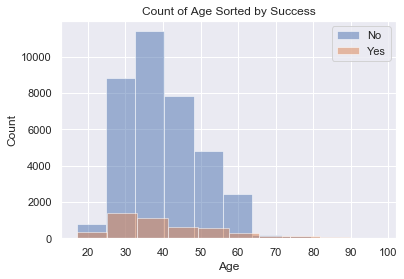

In [7]:
sns.set(style = 'darkgrid')
yes = df[df['y'] == 'yes']
no = df[df['y'] == 'no']
ax = plt.hist(x = 'age', alpha = 0.5, data = no)
ax = plt.hist(x = 'age', alpha = 0.5, data = yes)
ax = plt.title('Count of Age Sorted by Success')
ax = plt.legend(['No', 'Yes'])
ax = plt.xlabel('Age')
ax = plt.ylabel('Count')
plt.savefig('agecount.png')
plt.show()

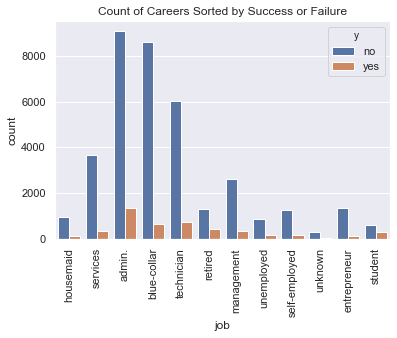

In [8]:
#early data analysis 
ax = sns.countplot(x = 'job', hue = 'y', data = df)
ax.set_title('Count of Careers Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.savefig('careers.png')
plt.show()


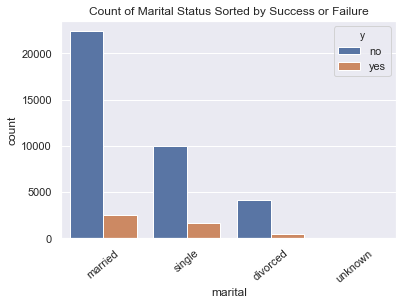

In [9]:
ax = sns.countplot(x = 'marital', hue = 'y', data = df)
ax.set_title('Count of Marital Status Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

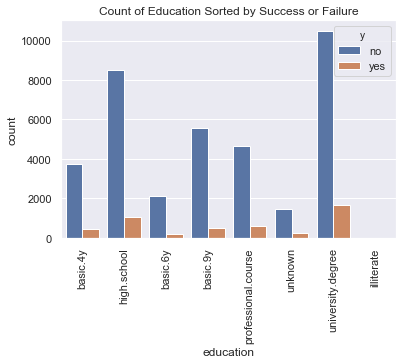

In [10]:
ax = sns.countplot(x = 'education', hue = 'y', data = df)
ax.set_title('Count of Education Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

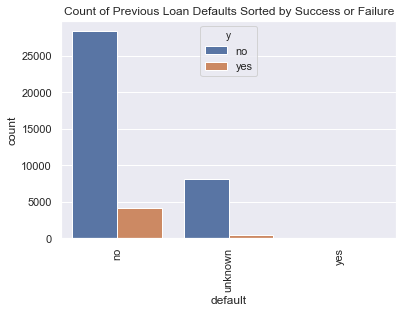

In [11]:
ax = sns.countplot(x = 'default', hue = 'y', data = df)
ax.set_title('Count of Previous Loan Defaults Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

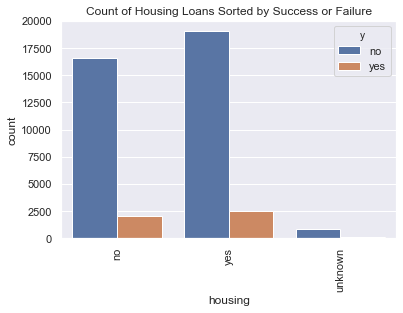

In [12]:
ax = sns.countplot(x = 'housing', hue = 'y', data = df)
ax.set_title('Count of Housing Loans Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

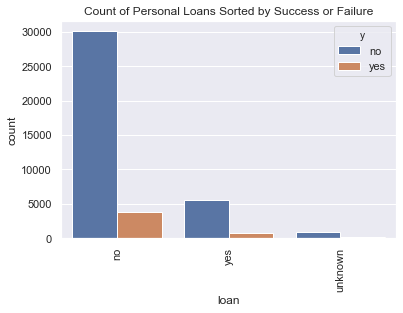

In [13]:
ax = sns.countplot(x = 'loan', hue = 'y', data = df)
ax.set_title('Count of Personal Loans Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

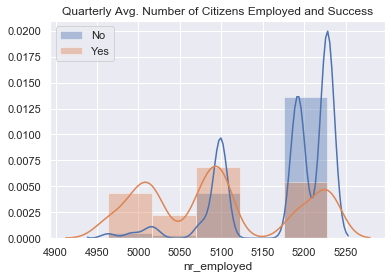

In [14]:
yes = df[df.y == 'yes']
no = df[df.y == 'no']

sns.distplot(no.nr_employed, bins = 5, label = 'No')
sns.distplot(yes.nr_employed, bins = 5, label = 'Yes')
plt.title('Quarterly Avg. Number of Citizens Employed and Success')
plt.legend()
plt.savefig('nremployed.png')
plt.show()

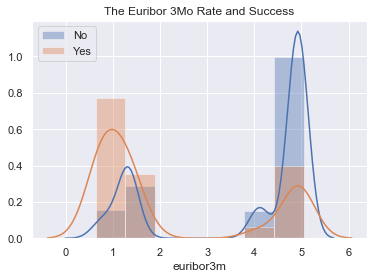

In [15]:
yes = df[df.y == 'yes']
no = df[df.y == 'no']

sns.distplot(no.euribor3m, bins = 7, label = 'No')
sns.distplot(yes.euribor3m, bins = 7, label = 'Yes')
plt.title('The Euribor 3Mo Rate and Success')
plt.legend()
plt.savefig('euribor3m.png')
plt.show()


In [16]:
#Descriptive Statistics 

yes.describe()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
no.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000
mean,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
std,9.898132,207.096293,2.873438,120.656868,0.409199,1.482932,0.558993,4.391155,1.638187,64.571979
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,95.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000
50%,38.000000,163.500000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000
75%,47.000000,279.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,95.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


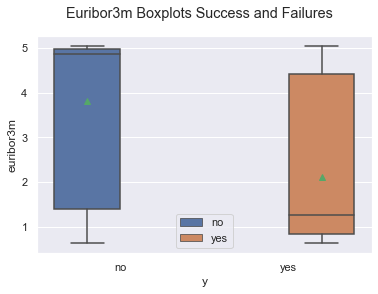

In [18]:
plt.plot()
sns.boxplot(y = 'euribor3m', x = 'y', data = df, hue = 'y', showmeans = True)
plt.legend(loc = 'lower center')
plt.suptitle('Euribor3m Boxplots Success and Failures')
plt.savefig('euriborboxplot.png')
plt.show()

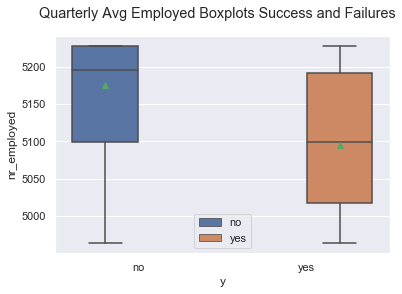

In [19]:
plt.figure()
sns.boxplot(y = 'nr_employed', x = 'y', data = df, hue = 'y', showmeans = True)
plt.legend(loc = 'lower center')
plt.suptitle('Quarterly Avg Employed Boxplots Success and Failures')
plt.savefig('employmentboxplot.png')
plt.show()

In [20]:
#descriptive t test euribor
meanyes = yes.euribor3m.mean()
meanno = no.euribor3m.mean()
stdyes = np.std(yes.euribor3m)
stdno = np.std(no.euribor3m)

#Given our sample sizes for both groups are high know our degrees of freedom and alpha = 0.05
#gives us a tcritical value of 1.96 two tailed test

#standard error
se = np.sqrt((stdyes**2/ len(yes)) + (stdno**2 / len(no)))
tstat = (meanyes-meanno)/se
tstat


-62.586022933524184

In [21]:
#descriptive t test employment numbers
meanyes = yes.nr_employed.mean()
meanno = no.nr_employed.mean()
stdyes = np.std(yes.nr_employed)
stdno = np.std(no.nr_employed)

#Given our sample sizes for both groups are high know our degrees of freedom and alpha = 0.05
#gives us a tcritical value of 1.96 two tailed test

#standard error
se = np.sqrt((stdyes**2/ len(yes)) + (stdno**2 / len(no)))
tstat = (meanyes-meanno)/se
tstat

-60.981357063962115

In [22]:
#apply machine learning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing


In [23]:
# Job and Marital status encoding. 
categorical_features = ['job', 'marital']
data1 = df

enc_job = preprocessing.OneHotEncoder()
job_enc = enc_job.fit_transform(df.job.values.reshape(-1,1)).toarray()
job_enc = pd.DataFrame(job_enc, columns = ['job_'+enc_job.categories_[0][int(i)]
                                        for i in range(job_enc.shape[1])])
data1 = pd.concat([df, job_enc], axis=1)

enc_mar = preprocessing.OneHotEncoder()
mar_enc = enc_mar.fit_transform(df.marital.values.reshape(-1,1)).toarray()
mar_enc = pd.DataFrame(mar_enc, columns = ['mar_'+ enc_mar.categories_[0][int(i)]
                                        for i in range(mar_enc.shape[1])])
data1 = pd.concat([data1,mar_enc], axis=1)

#print(data1)

In [24]:
#Encode housing/loan/default variables. Do they have housing loan/personal loan/or previous 
#credit default? no/0 yes/1 unknown/2

#print(df.loan.value_counts())

encoder = preprocessing.OrdinalEncoder(categories=[['unknown', 'yes', 'no']])
data1['housingenc'] = encoder.fit_transform(data1.housing.values.reshape(-1,1))
data1['defaultenc'] = encoder.fit_transform(data1.default.values.reshape(-1,1))
data1['loanenc'] = encoder.fit_transform(data1.loan.values.reshape(-1,1))

#Education Encoding
encoder = preprocessing.OrdinalEncoder(categories=[['unknown','illiterate','basic.4y', 'basic.6y',
                                                    'basic.9y', 'high.school','professional.course',
                                                    'university.degree']])
data1['educationenc'] = encoder.fit_transform(data1.education.values.reshape(-1,1))

#print(df.day_of_week.value_counts())
#Encode Month and day of the week variables
encoder = preprocessing.OrdinalEncoder(categories=[['jan', 'feb','mar','apr','may','jun','jul',
                                                   'aug','sep','oct','nov','dec']])
data1['monthenc'] = encoder.fit_transform(data1.month.values.reshape(-1,1))

encoder = preprocessing.OrdinalEncoder(categories=[['mon','tue','wed','thu','fri']])
data1['dayofweekenc'] = encoder.fit_transform(data1.day_of_week.values.reshape(-1,1))
#print(data1)

In [25]:
#Contact method Encoding cellular/0 or telephone/1

le = preprocessing.LabelEncoder()
contact_method= le.fit_transform(df.contact)
contact_method = pd.DataFrame(contact_method, columns = ['contact_method'])
data1['contact_method'] = contact_method

#previvous marketing campaign outcome, nonexistent/0, failure/1, success/2
encoder = preprocessing.OrdinalEncoder(categories=[['nonexistent', 'failure', 'success']])
data1['previouscamp'] = encoder.fit_transform(df.poutcome.values.reshape(-1,1))

#target variable encoding no/0 yes/1
yes = le.fit_transform(df.y)
data1['yes'] = pd.DataFrame(yes)

print(data1.head())
print(data1.columns)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  mar_unknown  housingenc  defaultenc  loanenc  \
0   may         mon  ...          0.0         2.0         2.0      2.0   
1   may         mon  ...          0.0         2.0         0.0      2.0   
2   may         mon  ...          0.0         1.0         2.0      2.0   
3   may         mon  ...          0.0         2.0         2.0      2.0   
4   may         mon  ...          0.0         2.0         2.0      1.0   

  educationenc  monthenc  dayofweekenc  contact_method  previouscamp  yes  
0          2.0       4

In [26]:
#Remove all uneccesary object variables, split into dependent and independent variables.

#data1.info()
data2 = data1.select_dtypes(exclude= 'object')
data2 = data2.drop(['duration', 'monthenc'], axis = 1)
data_fin = data2.drop(['yes'], axis = 1)
target_var = data1['yes']

data_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 32 columns):
age                  41188 non-null int64
campaign             41188 non-null int64
pdays                41188 non-null int64
previous             41188 non-null int64
emp_var_rate         41188 non-null float64
cons_price_idx       41188 non-null float64
cons_conf_idx        41188 non-null float64
euribor3m            41188 non-null float64
nr_employed          41188 non-null float64
job_admin.           41188 non-null float64
job_blue-collar      41188 non-null float64
job_entrepreneur     41188 non-null float64
job_housemaid        41188 non-null float64
job_management       41188 non-null float64
job_retired          41188 non-null float64
job_self-employed    41188 non-null float64
job_services         41188 non-null float64
job_student          41188 non-null float64
job_technician       41188 non-null float64
job_unemployed       41188 non-null float64
job_unknown        

Text(0.5, 1, 'Correlation Heatmap')

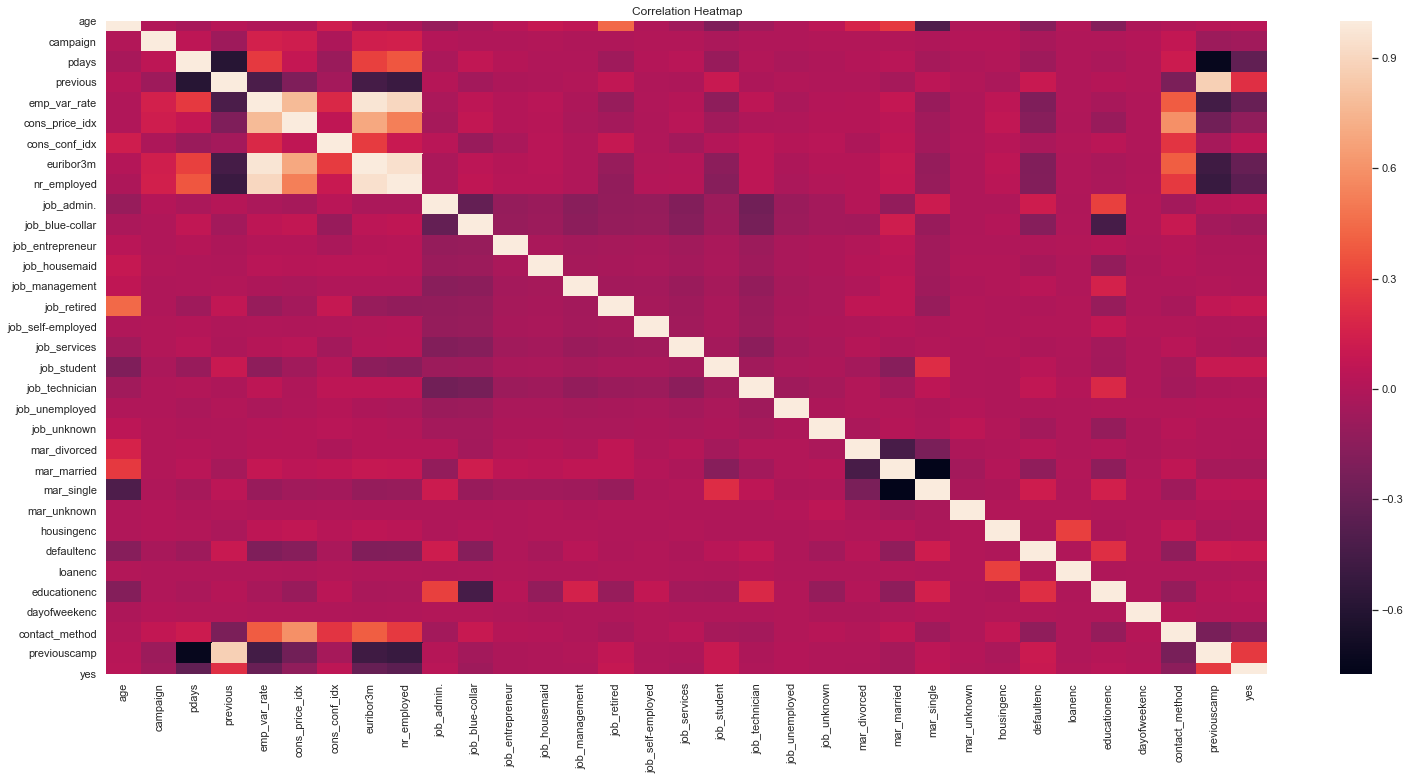

In [27]:
#perform correlation test
data2.corr()

plt.figure(figsize = (26, 12))
heatmap = sns.heatmap(data2.corr())
heatmap.set_title('Correlation Heatmap')

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint 

randomforest = RandomForestClassifier(random_state=42)
random_grid = {'n_estimators': [100, 200, 300, 400, 600, 1000, 1200, 1400, 1600, 1800],
              'max_depth': [3,5,10,20,30,40,50]}
    
clf = RandomizedSearchCV(randomforest,random_grid, random_state=42)
search = clf.fit(data_fin, target_var)
search.best_estimator_

C:\Users\xuanx\Miniconda3\envs\springboard1\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 156)

parameters = {
    'n_estimators': [100,200],
    'max_depth': [3]
}

cv_clf = GridSearchCV(estimator=clf, param_grid= parameters, cv = 5, return_train_score= True)

results = cv_clf.fit(data_fin, target_var)
results1 = results.cv_results_
best_ = results.best_params_

In [74]:
pd.set_option('display.max_columns', 30)
results1 = pd.DataFrame(results1)
print(results1)
pd.reset_option('display.max_rows')

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.812015      0.016104         0.049661        0.000753   
1       1.574785      0.034215         0.096730        0.002283   

  param_max_depth param_n_estimators                                 params  \
0               3                100  {'max_depth': 3, 'n_estimators': 100}   
1               3                200  {'max_depth': 3, 'n_estimators': 200}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.887351           0.887351           0.887351           0.621586   
1           0.887351           0.887351           0.887351           0.619764   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.144349         0.685612        0.289533                1   
1           0.144349         0.685248        0.289614                2   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.902033       

In [31]:
#after running gridsearch we have our parameters, need train/test for our model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

#Split data into train test groups. 
X_train, X_test, y_train, y_test = train_test_split(data_fin, target_var, 
                                                    test_size = 0.3,
                                                   random_state = 42)


Random Forest has an accuracy of: 0.899


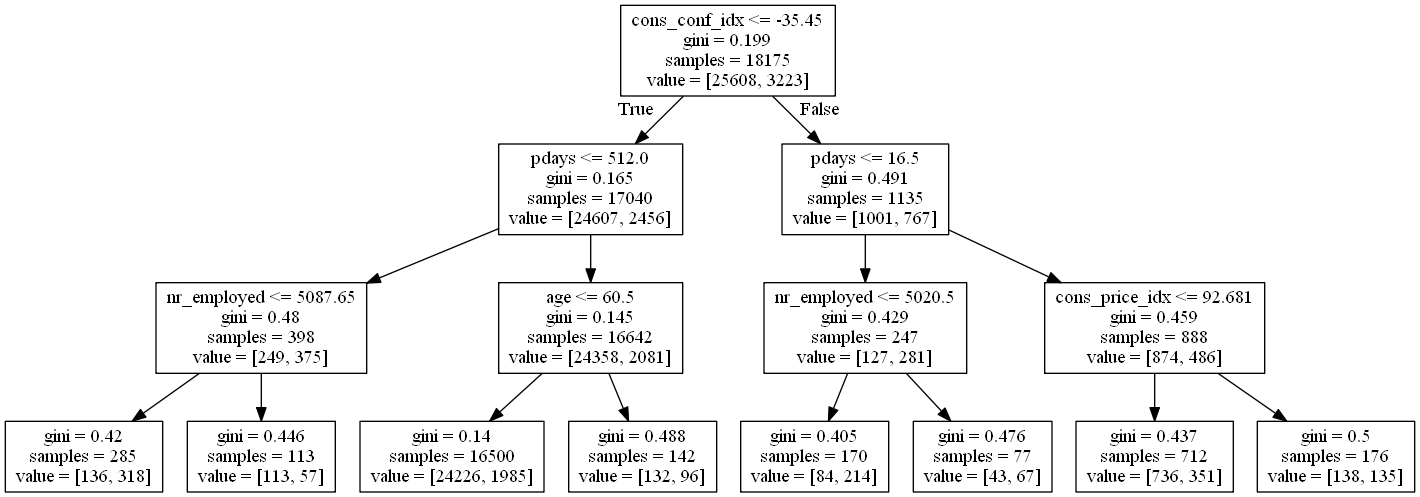

In [32]:
#Run randomforest classifier. 
clf = RandomForestClassifier(n_estimators = 100,
                             max_depth = 3, 
                            random_state = 42)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)
print('Random Forest has an accuracy of: %.3f' % accuracy)


from sklearn.tree import export_graphviz

#export as dot file
estimator = clf.estimators_[50]
export_graphviz(estimator, out_file = 'a3100tree.dot',
                feature_names = data_fin.columns,
                rounded = False)


!dot -Tpng a3100tree.dot -o a3100tree.png

from IPython.display import Image
Image(filename = 'a3100tree.png')

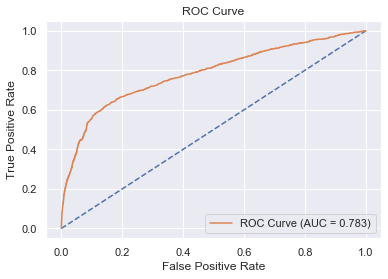

In [33]:
#calculate roc and auc of random forest classifier 

#Predict probabilities keeping positive outcomes only
y_pred_proba = clf.predict_proba(X_test)[:,1]

#Calculate the AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Calculate roc curve 
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test, y_pred_proba)

_ = plt.plot([0,1],[0,1], linestyle = '--')
_ = plt.plot(fpr_clf, tpr_clf, label = 'ROC Curve (AUC = %.3f)' 
             % auc)
_ = plt.title('ROC Curve')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(loc = 'lower right')
_ = plt.savefig('clfROC')
_ = plt.show()



In [35]:
treesoutput = open('regoutput', 'w')
feature_importance = pd.Series(clf.feature_importances_, 
                               index = data_fin.columns).sort_values(ascending=False)
print(feature_importance)
print(feature_importance[0:10], file = treesoutput)

nr_employed          0.222663
pdays                0.167638
euribor3m            0.148630
previouscamp         0.117644
emp_var_rate         0.107964
cons_conf_idx        0.086895
cons_price_idx       0.065348
previous             0.025929
age                  0.018954
contact_method       0.018172
defaultenc           0.004900
campaign             0.003291
job_student          0.002597
educationenc         0.001745
mar_single           0.001689
dayofweekenc         0.001624
job_retired          0.001609
job_blue-collar      0.001267
mar_married          0.000452
job_services         0.000285
job_admin.           0.000162
job_self-employed    0.000115
loanenc              0.000097
job_unknown          0.000073
job_housemaid        0.000067
job_entrepreneur     0.000065
mar_divorced         0.000051
job_management       0.000043
job_unemployed       0.000023
housingenc           0.000005
mar_unknown          0.000000
job_technician       0.000000
dtype: float64


In [37]:
#remove features with less than 0.01 importance.

cols = ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar','job_technician',
       'mar_divorced', 'mar_married', 'mar_single',
       'housingenc', 'defaultenc', 'loanenc', 'educationenc',
       'dayofweekenc', 'contact_method', 'previouscamp']

#rerun analysis
#Split data into train test groups. 
X_train, X_test, y_train, y_test = train_test_split(data_fin[cols], target_var, 
                                                    test_size = 0.3,
                                                   random_state = 42)
#Run randomforest classifier. 
clf = RandomForestClassifier(n_estimators = 100,
                             max_depth = 3, 
                            random_state = 42)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)
print('Random Forest has an accuracy of: %.3f' % accuracy)

Random Forest has an accuracy of: 0.899


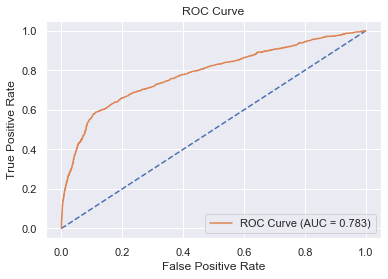

In [38]:
#Predict probabilities keeping positive outcomes only
y_pred_proba = clf.predict_proba(X_test)[:,1]

#Calculate the AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Calculate roc curve 
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test, y_pred_proba)

_ = plt.plot([0,1],[0,1], linestyle = '--')
_ = plt.plot(fpr_clf, tpr_clf, label = 'ROC Curve (AUC = %.3f)' 
             % auc)
_ = plt.title('ROC Curve')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(loc = 'lower right')
_ = plt.show()

[[10850   118]
 [ 1123   266]]

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.69      0.19      0.30      1389

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



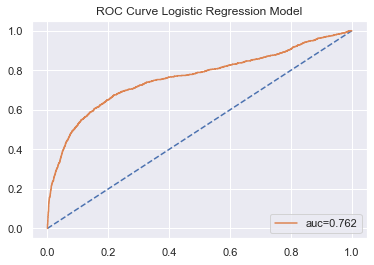

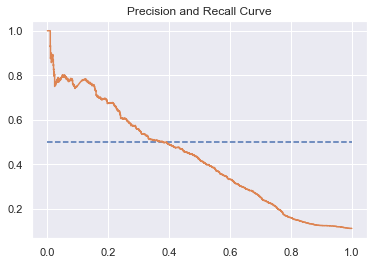

In [49]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, solver = 'liblinear', max_iter=4000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print()

print(metrics.classification_report(y_test, y_pred))

y_pred_proba = logreg.predict_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, label = 'auc=%.3f'% auc)
plt.title(label='ROC Curve Logistic Regression Model')
plt.legend(loc = 4)
plt.savefig('logregROC.png')
plt.show()

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
ap = metrics.average_precision_score(y_test, y_pred_proba)

plt.plot([0,1],[0.5,0.5], linestyle = '--')
plt.plot(recall, precision)
plt.title(label = 'Precision and Recall Curve')
plt.show()


In [41]:
import statsmodels.api as sm

logit_model = sm.Logit(target_var, data_fin)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.281450
         Iterations 8
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.200     
Dependent Variable:        yes                   AIC:                   23246.7208
Date:                      2020-11-28 18:38      BIC:                   23514.1238
No. Observations:          41188                 Log-Likelihood:        -11592.   
Df Model:                  30                    LL-Null:               -14499.   
Df Residuals:              41157                 LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            8.0000                                                 
----------------------------------------------------------------------------------
                   Coef.     Std.Err.      z     P>|z|      [0.025       0.975]   
-------------------

In [52]:
cols = ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
        'defaultenc',
       'dayofweekenc', 'contact_method', 'previouscamp','educationenc']

newdata = data_fin[cols]


logit_model = sm.Logit(target_var, newdata)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.283033
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.196     
Dependent Variable: yes              AIC:              23343.1477
Date:               2020-11-28 19:07 BIC:              23463.9103
No. Observations:   41188            Log-Likelihood:   -11658.   
Df Model:           13               LL-Null:          -14499.   
Df Residuals:       41174            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age               0.0031   0.0015   2.0509 0.0403  0.0001  0.0061
campaign         -0.0410   0.0093  -4.4138 0.0000 -0.0592 -0.0228


In [53]:
f = open('logregfile', 'w')
print(result.summary2(), file = f)

[[10850   118]
 [ 1126   263]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.69      0.19      0.30      1389

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



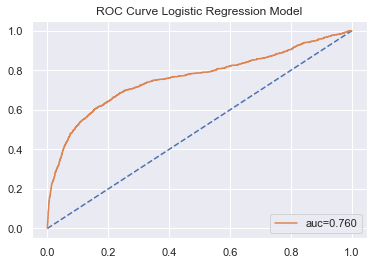

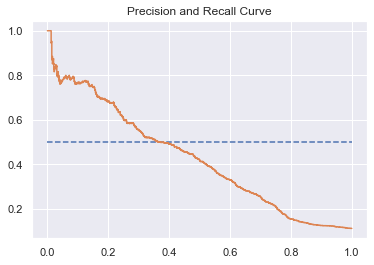

In [50]:
logreg = LogisticRegression(random_state=0, solver = 'liblinear', max_iter=4000)
logreg.fit(X_train[cols], y_train)
y_pred = logreg.predict(X_test[cols])
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print(metrics.classification_report(y_test, y_pred))

y_pred_proba = logreg.predict_proba(X_test[cols])[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, label = 'auc=%.3f'% auc)
plt.title(label='ROC Curve Logistic Regression Model')
plt.legend(loc = 4)
plt.show()

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
ap = metrics.average_precision_score(y_test, y_pred_proba)

plt.plot([0,1],[0.5,0.5], linestyle = '--')
plt.plot(recall, precision)
plt.title(label = 'Precision and Recall Curve')
plt.show()